### Bike Sharing Assignment With Linear Regression

In [50]:
# supress all warnings
import warnings
warnings.filterwarnings('ignore')

# importing the libraries for processing the data and also for creating models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


#### Reading the data from csv and viewing the data aswell

In [2]:
df = pd.read_csv('day.csv')
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Understanding the data shape and information

In [3]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.shape

(730, 16)

##### Find the data we can see that
1. Dataset has 730 rows and 16 columns using the df.shape
2. All columns has numeric data except the dteday column using df.info() which clearly shows dtypes: float64(4), int64(11), object(1)
3. Some of the columns are categorical columns with 0 and 1 value
4. Also we can see from the df.info() there total rows are 730 and non-null are 730 which clearly shows there are no null values


In [6]:
# lets see the columns
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# now remmoving the unwanted columns
df = df.drop(['instant', 'dteday'], axis=1)

In [8]:
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


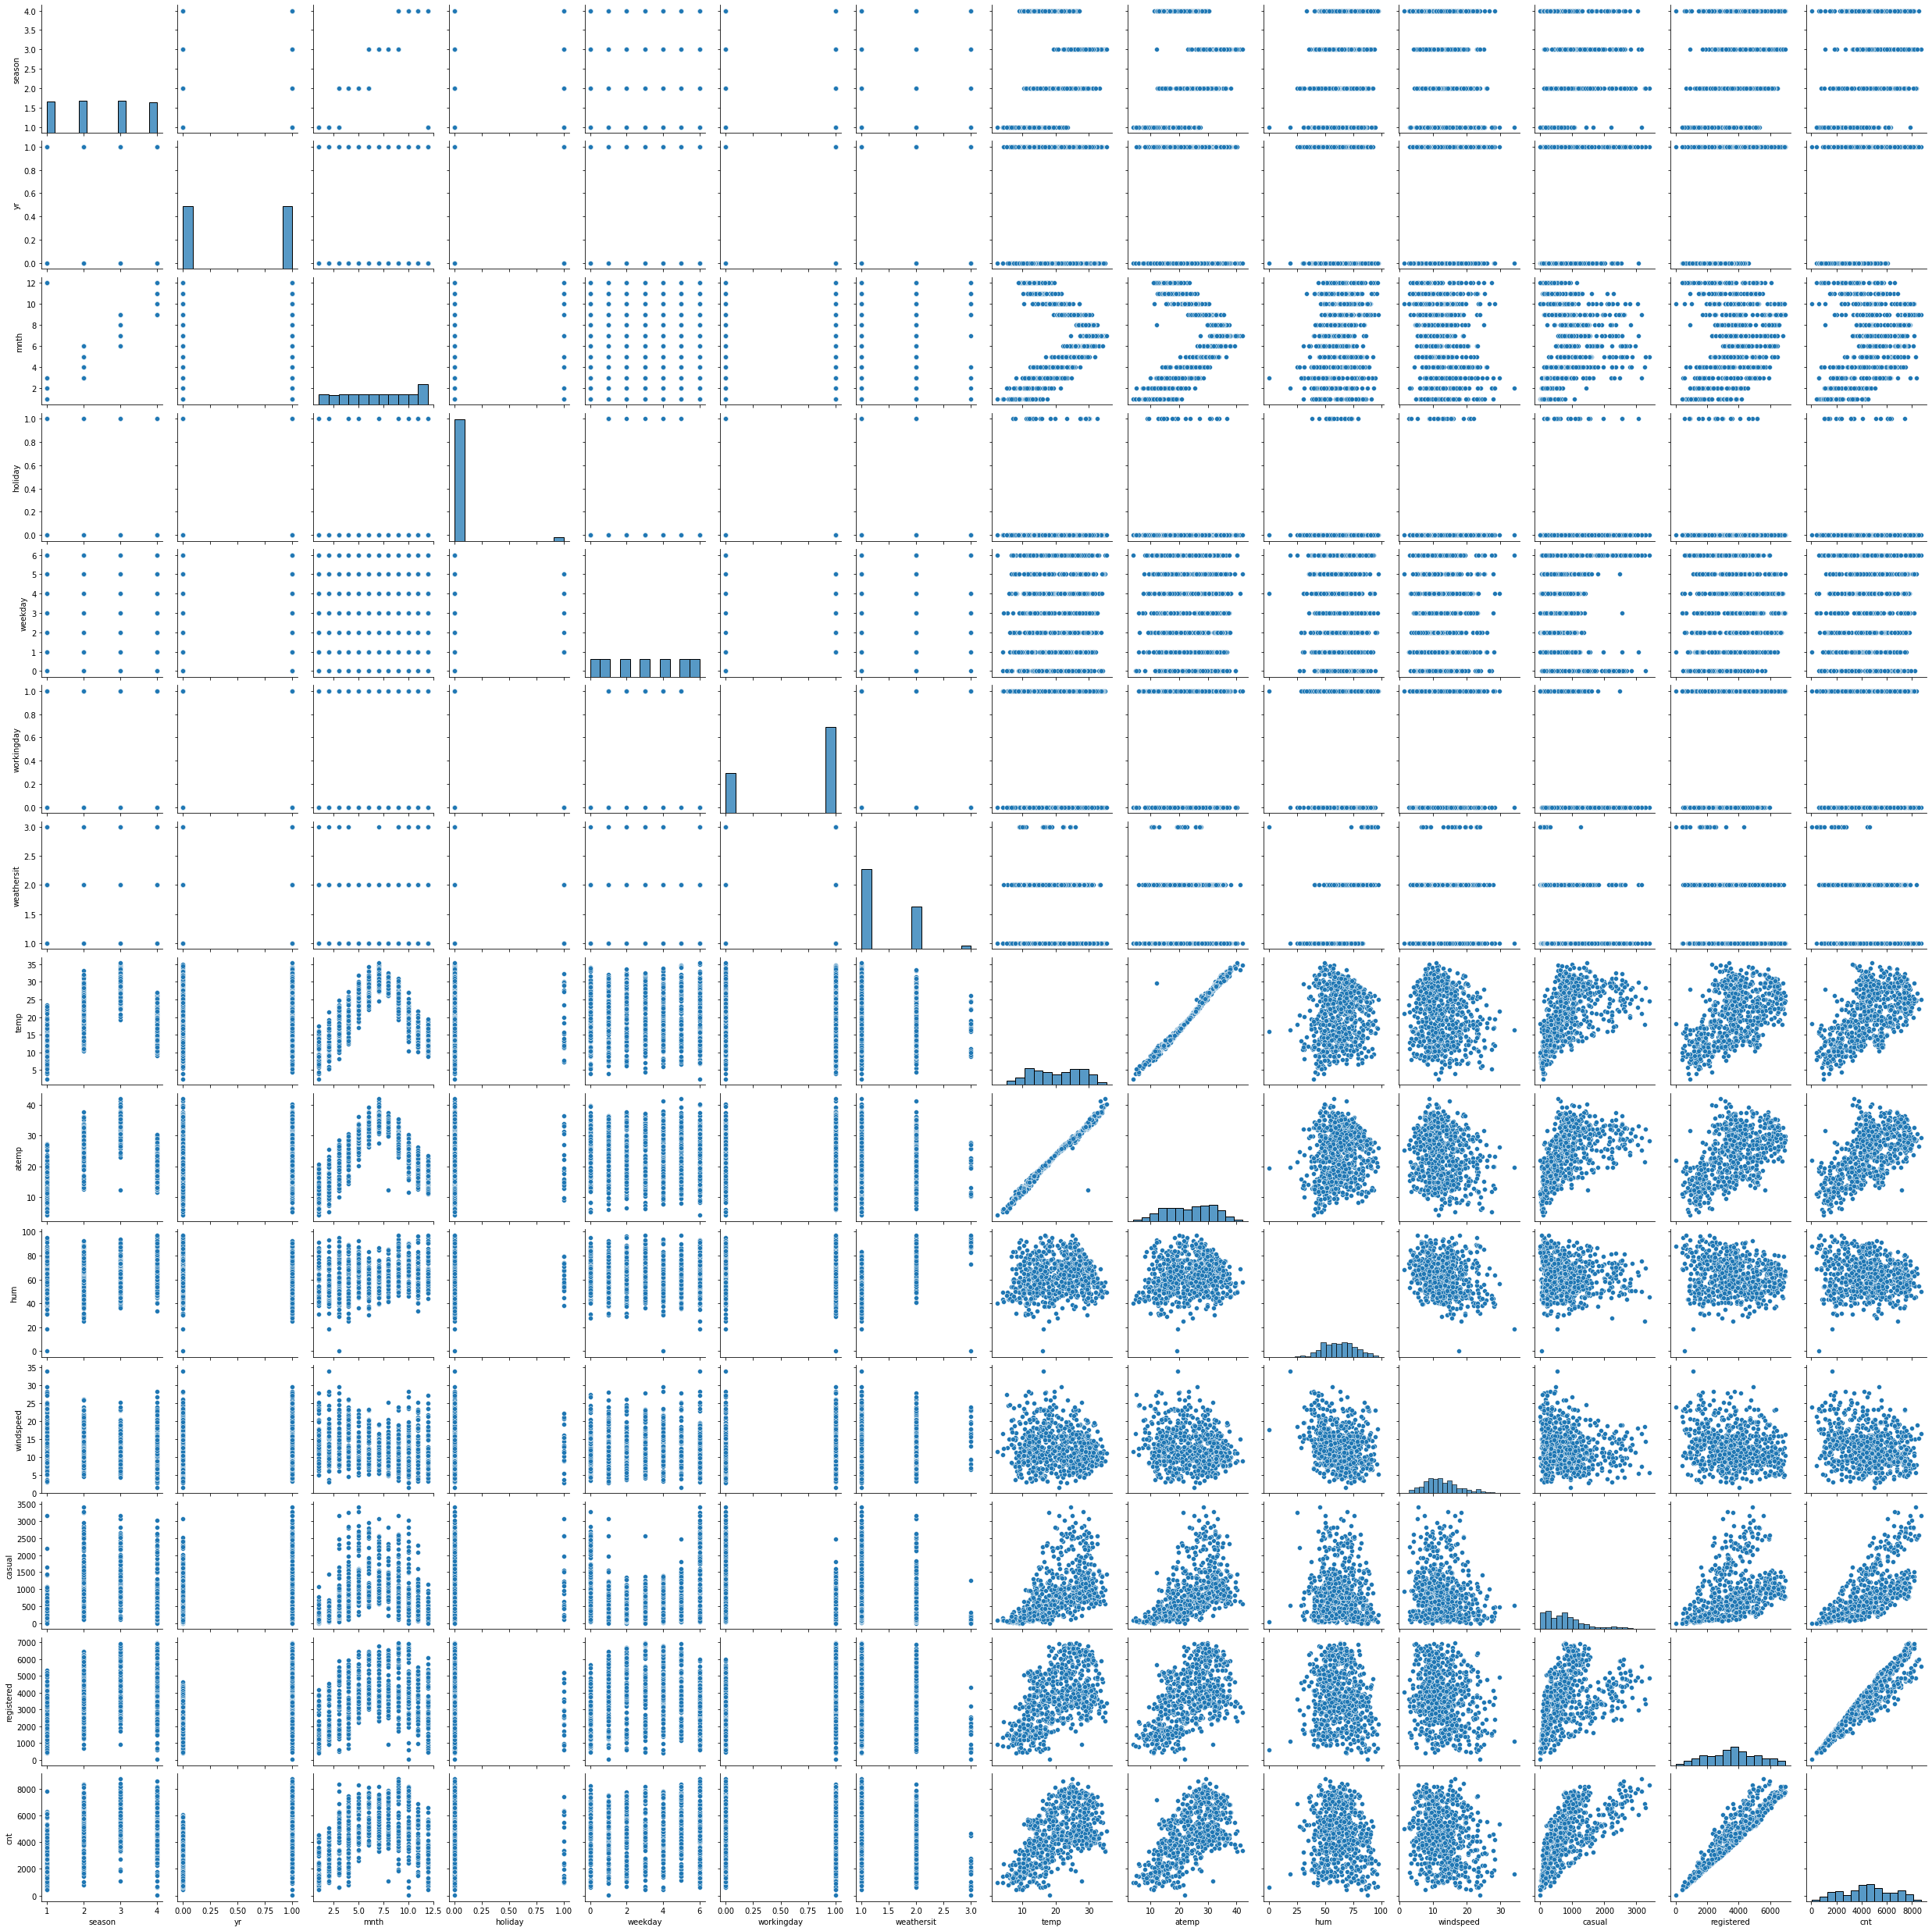

In [9]:
# visualizing the data
sns.pairplot(df)
plt.show()

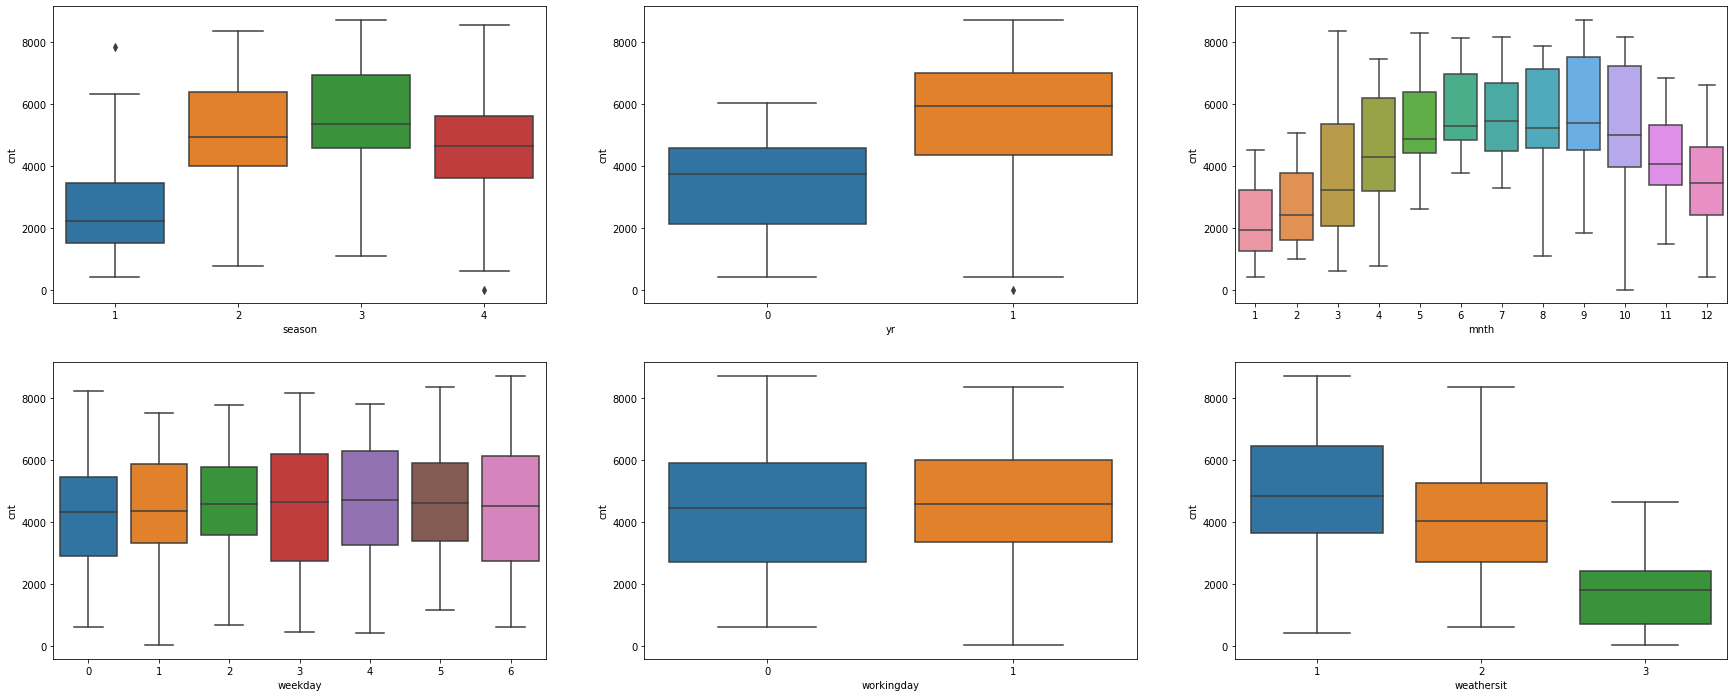

In [10]:
# visualizing the categorical value
plt.figure(figsize=(30, 12))
plt.subplot(2, 3, 1)
sns.boxplot(x='season', y='cnt', data=df)

plt.subplot(2, 3, 2)
sns.boxplot(x='yr', y='cnt', data=df)

plt.subplot(2, 3, 3)
sns.boxplot(x='mnth', y='cnt', data=df)

plt.subplot(2, 3, 4)
sns.boxplot(x='weekday', y='cnt', data=df)

plt.subplot(2, 3, 5)
sns.boxplot(x='workingday', y='cnt', data=df)

plt.subplot(2, 3, 6)
sns.boxplot(x='weathersit', y='cnt', data=df)

plt.show()

1. From the pair plot we can see that Season 3 and Season 4 registrations were more, 2019 people registered more than 2018, 
2. month aug, sept and october people registered more bikes.
3. Clear, Few clouds, Partly cloudy, Partly cloudy has more registration
4. People register bikes more during weekday rather than weekend
5. People register more during working day, rather than holidays and weekends



#### Split train and test data using Sklearn


In [11]:
# spliting data into 70-30 ratio
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
# printing the training and test dataset shape
print(df_train.shape)
print(df_test.shape)

(510, 14)
(220, 14)


### Re-scaling the data from 0-1 using MinMaxScaler


In [12]:
scaler = MinMaxScaler()
num_vars = ['season', 'mnth', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
# 2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
576,0.666667,1,0.545455,0,0.333333,1,0.0,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658
426,0.000000,1,0.181818,0,1.000000,0,0.5,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255
728,0.000000,1,1.000000,0,0.000000,0,0.0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096
482,0.333333,1,0.272727,0,1.000000,0,0.5,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973
111,0.333333,0,0.272727,0,0.833333,1,0.5,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095


In [13]:
df_train.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.504575,0.507843,0.503743,0.025490,0.498366,0.676471,0.201961,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.513499
std,0.370078,0.500429,0.315038,0.157763,0.336182,0.468282,0.273944,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.181818,0.000000,0.166667,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420
50%,0.666667,1.000000,0.545455,0.000000,0.500000,1.000000,0.000000,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.518638
75%,0.666667,1.000000,0.818182,0.000000,0.833333,1.000000,0.500000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


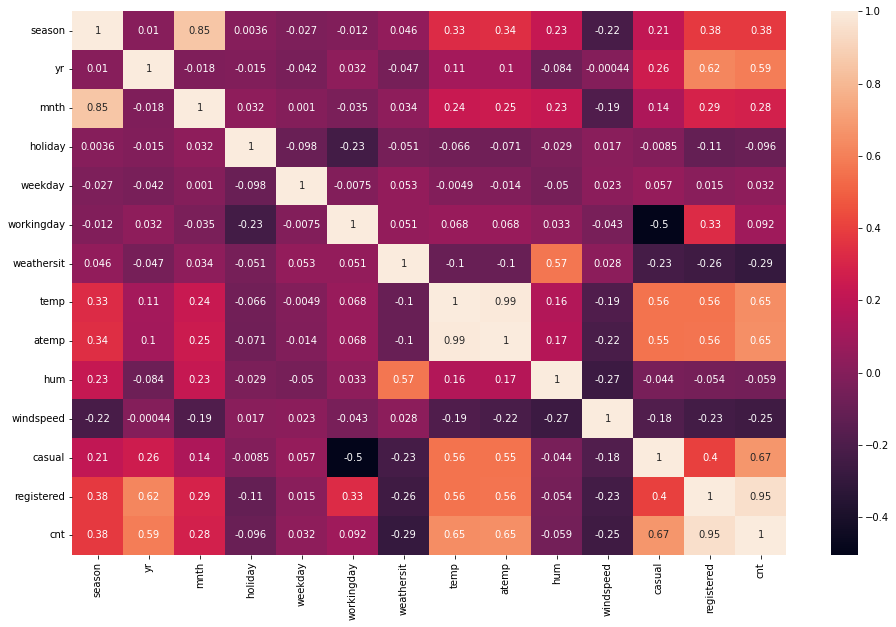

In [14]:
# viewing the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [15]:
# Building linear model
y_train = df_train.pop('cnt')
X_train = df_train

In [16]:
# calling the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [17]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,season,True,1
1,yr,True,1
2,mnth,True,1
3,holiday,True,1
4,weekday,True,1
5,workingday,True,1
6,weathersit,True,1
7,temp,True,1
8,atemp,True,1
9,hum,True,1


In [18]:
# fitting the data with the training dataset 
col = X_train.columns[rfe.support_]

X_train_rfe = X_train[col]

# adding constant
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

# here you can see the r-squared, adjusted r-squared and p-value of all features
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.909e+29
Date:                Sun, 10 Jul 2022   Prob (F-statistic):               0.00
Time:                        02:46:05   Log-Likelihood:                 16303.
No. Observations:                 510   AIC:                        -3.258e+04
Df Residuals:                     496   BIC:                        -3.252e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.184e-15   1.07e-15      1.110      0.268   -9.12e-16    3.28e-15
season      2.342e-16   7.95e-16      0.294      0.769   -1.33e-15     1.8e-15
yr          1.171e-16   4.77e-16      0.246      0.806    -8.2e-16    1.05e-15
mnth        4.914e-16   8.79e-16      0.559      0.577   -1.24e-15    2.22e-15
holiday     1.518e-17   9.52e-16      0.016      0.987   -1.86e-15    1.89e-15
weekday    -8.066e-17   4.36e-16     -0.185      0.853   -9.37e-16    7.76e-16
workingday  4.959e-16   5.62e-16      0.883      0.378   -6.08e-16     1.6e-15
weathersit  1.388e-16   7.12e-16      0.195      0.846   -1.26e-15    1.54e-15
temp        1.363e-15   4.49e-15      0.304      0.761   -7.45e-15    1.02e-14
atemp        -8.5e-16   4.81e-15     -0.177      0.860   -1.03e-14     8.6e-15
hum         6.557e-16   1.34e-15      0.491      0.624   -1.97e-15    3.28e-15
windspeed  -3.556e-16   9.47e-16     -0.375      0.708   -2.22e-15    1.51e-15
casual         0.3775   1.34e-15   2.81e+14      0.000       0.377       0.377
registered     0.7968   1.59e-15   5.02e+14      0.000       0.797       0.797
==============================================================================
Omnibus:                       23.220   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.839
Skew:                           0.453   Prob(JB):                     1.81e-05
Kurtosis:                       2.545   Cond. No.                         92.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def get_vif(X_train_rfe):
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

get_vif(X_train_rfe)

,Features,VIF
8,atemp,350.81
7,temp,335.63
12,registered,40.22
9,hum,16.62
2,mnth,13.39
0,season,12.15
5,workingday,10.05
11,casual,9.10
1,yr,5.70
10,windspeed,3.81


In [20]:
# creating a function to remove features one by one
def dropColums(colName, col):
    col = col.drop([colName])
    X_train_rfe = X_train[col]
    X_train_sm = sm.add_constant(X_train_rfe)
    lr2 = sm.OLS(y_train, X_train_sm)
    lr_model_2 = lr2.fit()
    print(lr_model_2.summary())
    return (col, X_train_rfe, X_train_sm, lr2, lr_model_2)

# removing first feature atemp
col, X_train_rfe, X_train_sm, lr2, lr_model_2 = dropColums('atemp', col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.437e+31
Date:                Sun, 10 Jul 2022   Prob (F-statistic):               0.00
Time:                        02:46:05   Log-Likelihood:                 17384.
No. Observations:                 510   AIC:                        -3.474e+04
Df Residuals:                     497   BIC:                        -3.469e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.203e-16   1.28e-16     -1.725      0.0

In [21]:
# viewing the vif after removing the feature
get_vif(X_train_rfe)

,Features,VIF
11,registered,39.90
7,temp,16.42
8,hum,15.92
2,mnth,13.39
0,season,12.15
5,workingday,10.05
10,casual,9.09
1,yr,5.67
9,windspeed,3.75
4,weekday,3.19


In [22]:
# removing the second feature registered
col, X_train_rfe, X_train_sm, lr2, lr_model_2 = dropColums('registered', col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     397.0
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          2.53e-238
Time:                        02:46:05   Log-Likelihood:                 620.10
No. Observations:                 510   AIC:                            -1216.
Df Residuals:                     498   BIC:                            -1165.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0496      0.024      2.073      0.0

In [23]:
# viewing the vif after removing the second feature
get_vif(X_train_rfe)

,Features,VIF
8,hum,15.91
7,temp,14.40
2,mnth,13.34
0,season,11.34
10,casual,7.80
5,workingday,5.85
9,windspeed,3.67
4,weekday,3.14
1,yr,2.36
6,weathersit,2.34


In [24]:
 # removing the third feature hum
col, X_train_rfe, X_train_sm, lr2, lr_model_2 = dropColums('hum', col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     435.9
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          2.77e-239
Time:                        02:46:05   Log-Likelihood:                 619.23
No. Observations:                 510   AIC:                            -1216.
Df Residuals:                     499   BIC:                            -1170.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0256      0.015      1.667      0.0

In [25]:
# viewing the VIF after removing the feature
get_vif(X_train_rfe)

,Features,VIF
7,temp,13.56
2,mnth,12.47
0,season,11.26
9,casual,7.49
5,workingday,5.24
8,windspeed,3.37
4,weekday,3.07
1,yr,2.36
6,weathersit,1.60
3,holiday,1.09


In [26]:
col, X_train_rfe, X_train_sm, lr2, lr_model_2 = dropColums('temp', col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     418.6
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          2.30e-226
Time:                        02:46:05   Log-Likelihood:                 585.64
No. Observations:                 510   AIC:                            -1151.
Df Residuals:                     500   BIC:                            -1109.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0457      0.016      2.824      0.0

In [27]:
get_vif(X_train_rfe)

,Features,VIF
2,mnth,12.44
0,season,11.16
7,windspeed,3.30
8,casual,3.22
5,workingday,3.08
4,weekday,3.07
1,yr,2.30
6,weathersit,1.58
3,holiday,1.07


In [28]:
col, X_train_rfe, X_train_sm, lr2, lr_model_2 = dropColums('mnth', col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     470.6
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          1.79e-227
Time:                        02:46:05   Log-Likelihood:                 585.07
No. Observations:                 510   AIC:                            -1152.
Df Residuals:                     501   BIC:                            -1114.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0501      0.016      3.202      0.0

In [29]:
# finally after removing some features, the VIF came down bellow 5
get_vif(X_train_rfe)

,Features,VIF
6,windspeed,3.23
7,casual,3.22
4,workingday,3.07
3,weekday,3.01
0,season,2.96
1,yr,2.30
5,weathersit,1.58
2,holiday,1.07


In [30]:
lr_model_2.params

const         0.050087
season        0.138432
yr            0.173847
holiday       0.022717
weekday       0.018514
workingday    0.213878
weathersit   -0.113217
windspeed    -0.068279
casual        0.767851
dtype: float64

#### Residual Analysis of the train data


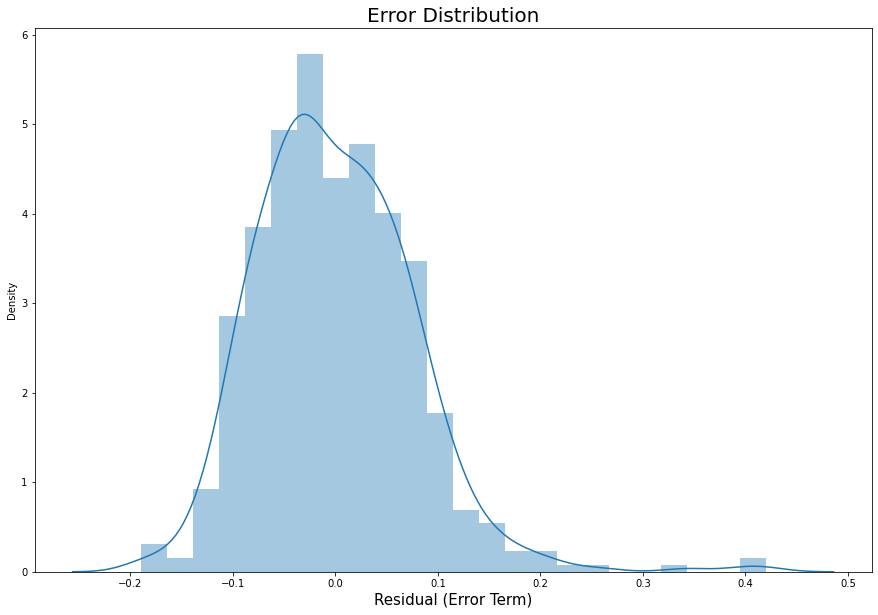

In [31]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
y_train_pred = lr_model_2.predict(X_train_sm)
residual = y_train_pred - y_train
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 15})
plt.title('Error Distribution', fontdict={'fontsize': 20})
sns.distplot(residual,ax=ax)
plt.show()

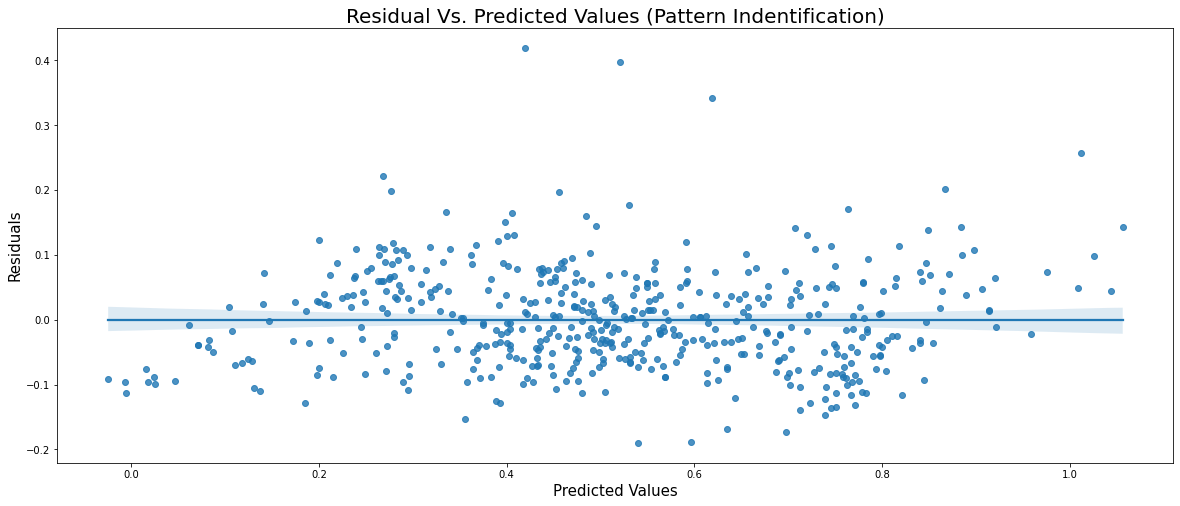

In [32]:
# plotting linear regression data fit 
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(x=y_train_pred, y=residual,ax=ax)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

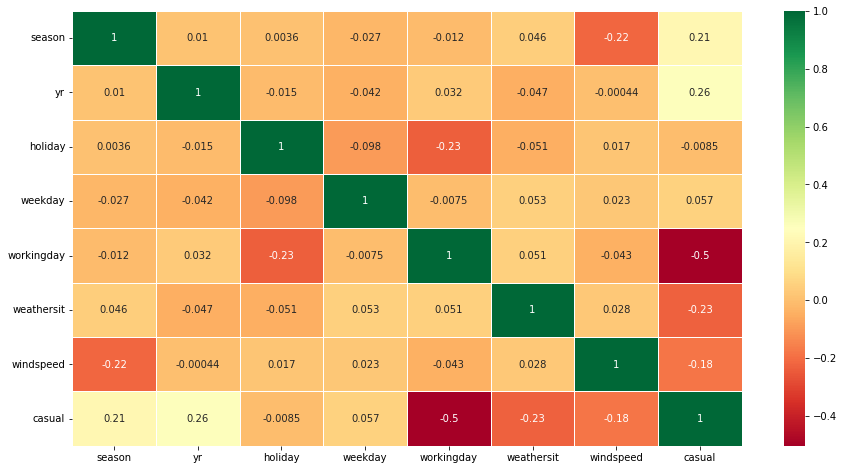

In [33]:
# plotting heat map
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [34]:
# now transforming the test data, here we don't need to use fit_transform
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [35]:
# dropping the cnt column and cnt will be the y_test
y_test = df_test.pop('cnt')

In [36]:
# rest all data will be X_test
X_test = df_test

In [37]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      220 non-null    float64
 1   yr          220 non-null    int64  
 2   mnth        220 non-null    float64
 3   holiday     220 non-null    int64  
 4   weekday     220 non-null    float64
 5   workingday  220 non-null    int64  
 6   weathersit  220 non-null    float64
 7   temp        220 non-null    float64
 8   atemp       220 non-null    float64
 9   hum         220 non-null    float64
 10  windspeed   220 non-null    float64
 11  casual      220 non-null    float64
 12  registered  220 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 24.1 KB


In [38]:
# we are adding constant again same as X_train
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [39]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       220 non-null    float64
 1   season      220 non-null    float64
 2   yr          220 non-null    int64  
 3   holiday     220 non-null    int64  
 4   weekday     220 non-null    float64
 5   workingday  220 non-null    int64  
 6   weathersit  220 non-null    float64
 7   windspeed   220 non-null    float64
 8   casual      220 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 17.2 KB


In [40]:
X_test_new.head()

,const,season,yr,holiday,weekday,workingday,weathersit,windspeed,casual
184,1.0,0.666667,0,1,0.166667,0,0.5,0.084219,0.933557
535,1.0,0.333333,1,0,0.500000,1,0.0,0.153728,0.265163
299,1.0,1.000000,0,0,0.666667,1,0.5,0.334206,0.072539
221,1.0,0.666667,0,0,0.500000,1,0.0,0.339570,0.268820
152,1.0,0.333333,0,0,0.666667,1,0.0,0.537414,0.223712


In [41]:
# predicting the y_pred
y_pred = lr_model_2.predict(X_test_new)

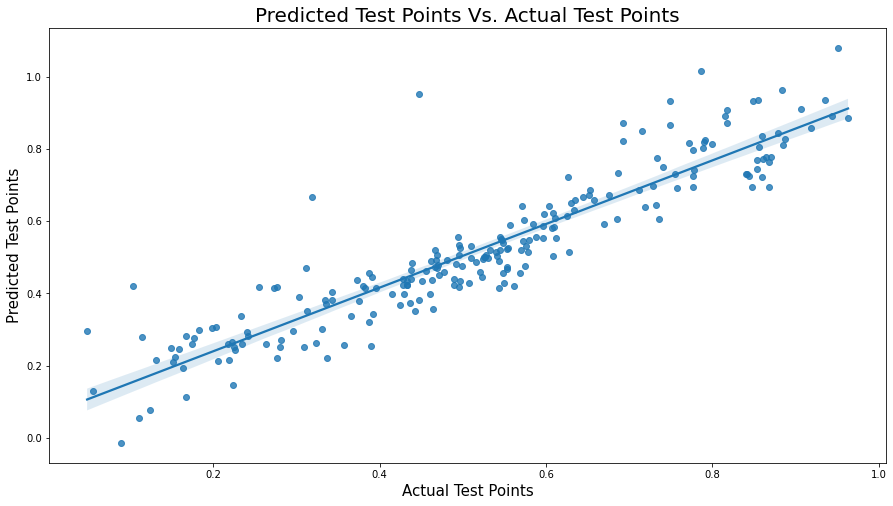

In [42]:
# displaying the linear regression model of test dataset
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
corr_plot = sns.regplot(x=y_test, y=y_pred,ax=ax)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

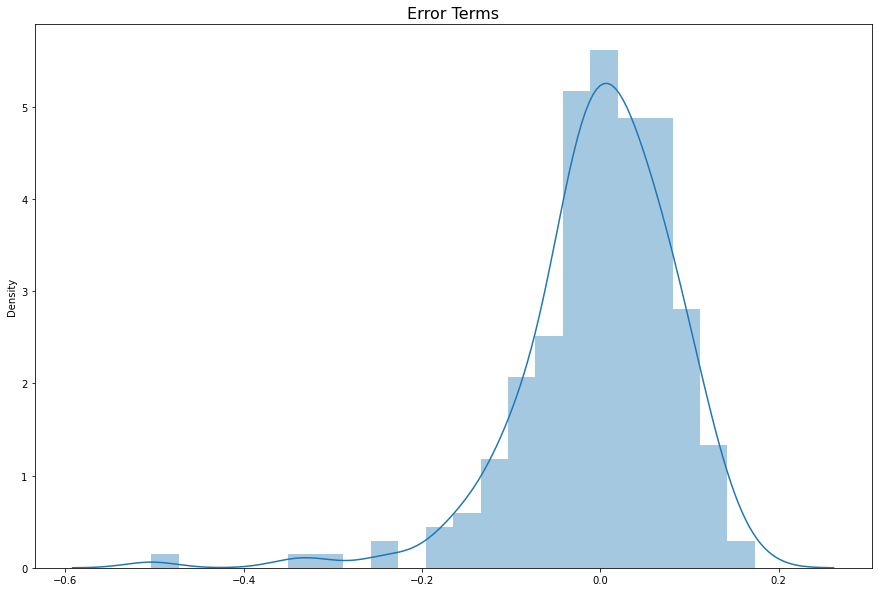

In [43]:
# checking the error rate of the model
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
res_test = y_test - y_pred
plt.title('Error Terms', fontsize=16) 
sns.distplot(res_test)
plt.show()


In [44]:
# calculating the r2_score
r2_score = r2_score(y_test, y_pred)
r2_score

0.8440774144781611

In [45]:
X_test_new.shape

(220, 9)

In [46]:
n= X_test_new.shape[0]
n

220

In [47]:
p = X_test_new.shape[1]
p

9

In [48]:
# calculating the adjusted r^2
adjusted_r2 = 1-(1-r2_score)*(n-1)/(n-p-1)
adjusted_r2

0.8373950179557965

In [51]:
# Mean Sqare Error
mse = mean_squared_error(y_test, y_pred)
print('Mean_Squared_Error :' ,round(mse,4))

Mean_Squared_Error : 0.0075


#### The equation of our best fitted line: 
* Target variable = 0.050087 + (season * 0.138432) + (yr * 0.173847) + (holiday * 0.022717) + (weekday * 0.018514) + (workingday    0.213878) - (weathersit * 0.113217) - (windspeed * 0.068279) + (casual * 0.767851)
    